In [89]:
# export a math latex expression as an SVG
from sympy import *
x = symbols('x')
expr = x**2 + 2*x + 1
preview(expr, viewer='file', filename='expression.svg', euler=False)

## 3.1.1 Data versus Beliefs

### Coin Flip Simulation

In [62]:
from random import random

heads, tails = 0, 0
p = 0.5 # probability of event (heads)

for i in range(1000):
    if random() < p:
        heads += 1
    else:
        tails += 1

# Should roughly be 500 heads, 500 tails
print(f"HEADS: {heads}, TAILS: {tails}")

HEADS: 500, TAILS: 500


## 3.2.1 Bernoulli Distribution

### Figure 3.1

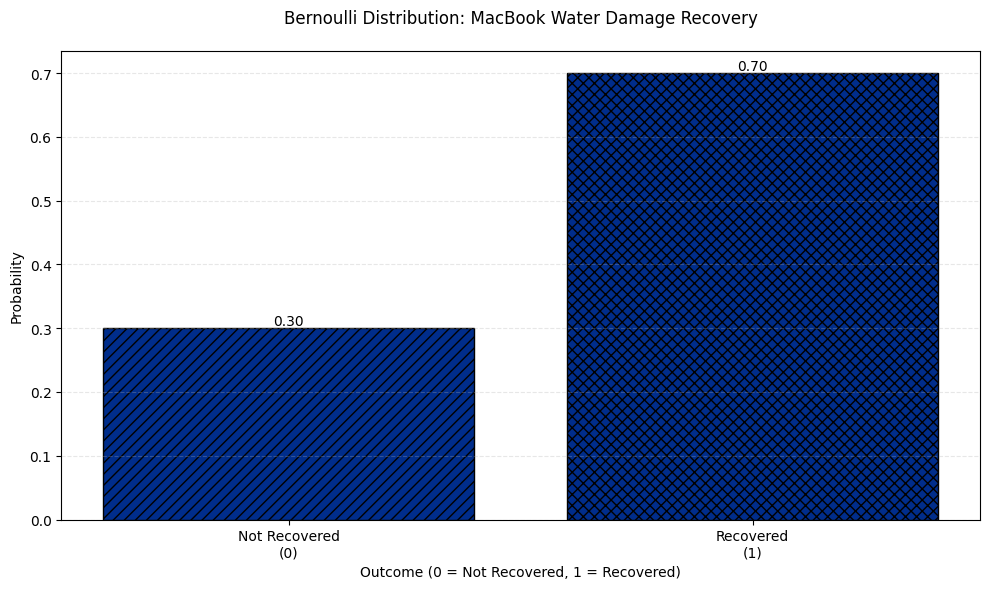

In [63]:
import matplotlib.pyplot as plt

# Parameters
p = 0.7  # probability of success (recovery)
x = [0, 1]  # possible outcomes
probabilities = [1-p, p]  # probabilities of failure and success

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x, probabilities,
              color=['#002d8b'],
              hatch=['///', 'xxx'],          # fill patterns
              edgecolor='black')

# Add labels and title
plt.title('Bernoulli Distribution: MacBook Water Damage Recovery', pad=20)
plt.xlabel('Outcome (0 = Not Recovered, 1 = Recovered)')
plt.ylabel('Probability')

# Add value labels on top of bars
for i, prob in enumerate(probabilities):
   plt.text(i, prob, f'{prob:.2f}', ha='center', va='bottom')

# Customize x-axis ticks
plt.xticks(x, ['Not Recovered\n(0)', 'Recovered\n(1)'])

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

plt.savefig('JjOaxnI2.svg')
plt.savefig('JjOaxnI2.pdf')
plt.savefig('JjOaxnI2.png')

plt.show()

### Simple Bernoulli Implementation

In [64]:
bernoulli = {
    0 : .30,
    1: .70
}

for x,p in bernoulli.items():
    print(f"P(X={x}) = {p}")

# PRINTS:
# P(X=0) = 0.30
# P(X=1) = 0.70

P(X=0) = 0.3
P(X=1) = 0.7


### Bernoulli Random Sample

In [65]:
import numpy as np

sample = np.random.choice([0, 1], p=[.30, .70])

# prints 0 or 1
print(sample)


1


## 3.2.2 Discrete Distribution

### Figure 3.2 Visualizing the Discrete Distribution

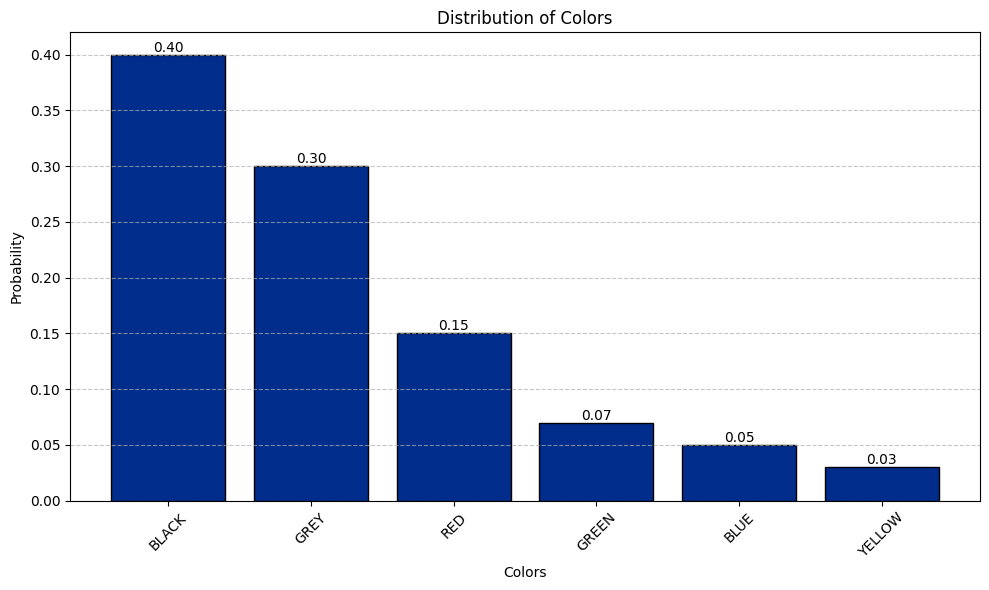

In [66]:
import matplotlib.pyplot as plt

data = {
   "BLACK": .4,
   "GREY": .3,
   "RED": .15,
   "GREEN": .07,
   "BLUE": .05,
   "YELLOW": .03
}

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color='#002d8b', edgecolor='black')

# Customize the chart
plt.title('Distribution of Colors', fontsize=12)
plt.xlabel('Colors', fontsize=10)
plt.ylabel('Probability', fontsize=10)

# Add value labels on top of each bar
for i, v in enumerate(data.values()):
   plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.savefig('qJlxFMS7.svg')
plt.savefig('qJlxFMS7.pdf')
plt.savefig('qJlxFMS7.png')
plt.show()


### Plain Python Discrete Distribution Implementation

In [67]:
discrete_dist = {
  "BLACK": .4,
  "GREY": .3,
  "RED": .15,
  "GREEN": .07,
  "BLUE": .05,
  "YELLOW": .03
}

for x,p in discrete_dist.items():
   print(f"P(X={x}) = {p}")

#PRINTS:
# P(X=BLACK) = 0.4
# P(X=GREY) = 0.3
# P(X=RED) = 0.15
# P(X=GREEN) = 0.07
# P(X=BLUE) = 0.05
# P(X=YELLOW) = 0.03


P(X=BLACK) = 0.4
P(X=GREY) = 0.3
P(X=RED) = 0.15
P(X=GREEN) = 0.07
P(X=BLUE) = 0.05
P(X=YELLOW) = 0.03


### Discrete Distribution Random Samples

In [68]:
import numpy as np

discrete_dist = {
  "BLACK": .4,
  "GREY": .3,
  "RED": .15,
  "GREEN": .07,
  "BLUE": .05,
  "YELLOW": .03
}

sample = np.random.choice([*discrete_dist.keys()], p=[*discrete_dist.values()])

# Outputs a color
print(sample)


BLACK


## 3.2.3 Binomial Distribution

### Simulation of MP3 Player Failure

In [69]:
from random import random

# probability of event
p = 0.9

# start each outcome at 0
outcomes = {key: 0 for key in range(11)}

# We run 10,0000 experiments
for i in range(10000):
  # Each experiment does 10 trials
  successes = 0
  for j in range(10):
      # simulate a weighted coin flip
      if random() < p:
          successes += 1

  outcomes[successes] +=1

# Show outcomes of experiments
for k,v in outcomes.items():
  print(f"Experiments with {k} successes: {v}")


Experiments with 0 successes: 0
Experiments with 1 successes: 0
Experiments with 2 successes: 0
Experiments with 3 successes: 1
Experiments with 4 successes: 0
Experiments with 5 successes: 8
Experiments with 6 successes: 101
Experiments with 7 successes: 536
Experiments with 8 successes: 1998
Experiments with 9 successes: 3810
Experiments with 10 successes: 3546


### Plotting the Simulation

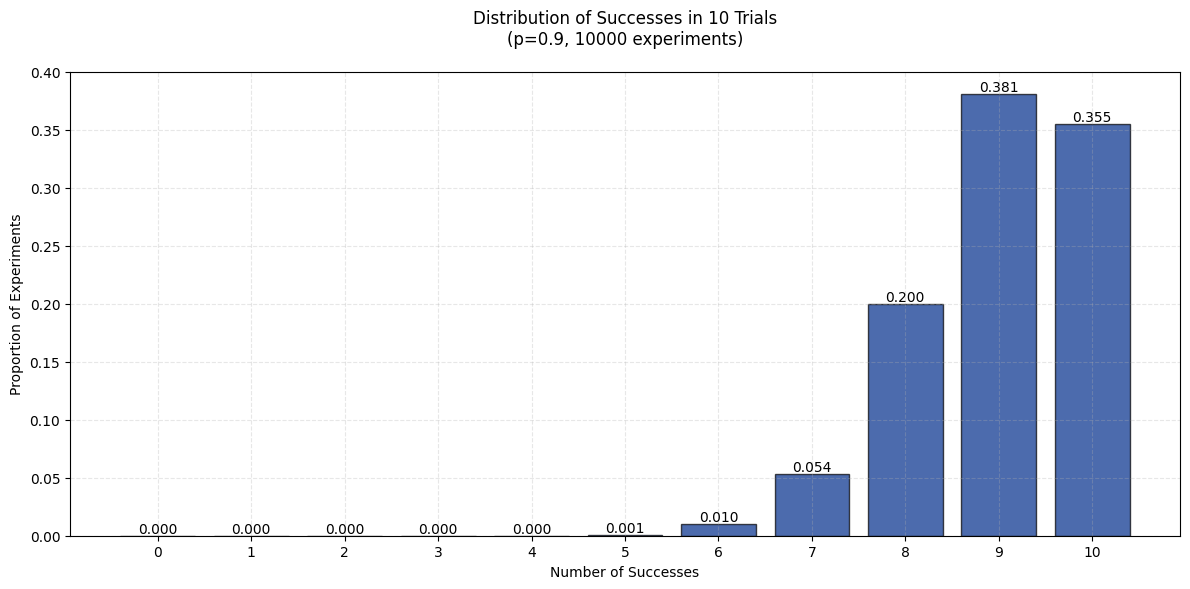

In [70]:
# Create the visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for plotting
x = list(outcomes.keys())
y = [count/10000 for count in outcomes.values()]  # Convert to proportions

# Create bars
bars = ax.bar(x, y,
             color='#002d8b',
             edgecolor='black',
             alpha=0.7)

# Customize the plot
ax.set_title('Distribution of Successes in 10 Trials\n(p=0.9, 10000 experiments)',
            pad=20, fontsize=12)
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Proportion of Experiments')

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Set x-axis ticks
ax.set_xticks(x)

# Add value labels on top of each bar
for bar in bars:
   height = bar.get_height()
   ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.3f}',
           ha='center', va='bottom')

# Adjust layout
plt.tight_layout()


plt.savefig('YhUWbTNA.svg')
plt.savefig('YhUWbTNA.pdf')
plt.savefig('YhUWbTNA.png')

# Show plot
plt.show()


### Binomial Distribution in SciPy

In [2]:
import numpy as np
from scipy.stats import binom

# Set the number of trials and probability of success
n = 10
p = 0.9

# Generate k values
k = np.arange(0, n + 1)

# Calculate the probability mass function (PMF)
y = binom.pmf(k, n, p)

for _k, _y in zip(k,y):
   print(f"The probability of {_k}/{n} successes is {_y:.4f}")


The probability of 0/10 successes is 0.0000
The probability of 1/10 successes is 0.0000
The probability of 2/10 successes is 0.0000
The probability of 3/10 successes is 0.0000
The probability of 4/10 successes is 0.0001
The probability of 5/10 successes is 0.0015
The probability of 6/10 successes is 0.0112
The probability of 7/10 successes is 0.0574
The probability of 8/10 successes is 0.1937
The probability of 9/10 successes is 0.3874
The probability of 10/10 successes is 0.3487


### Plotting the Binomial Distribution

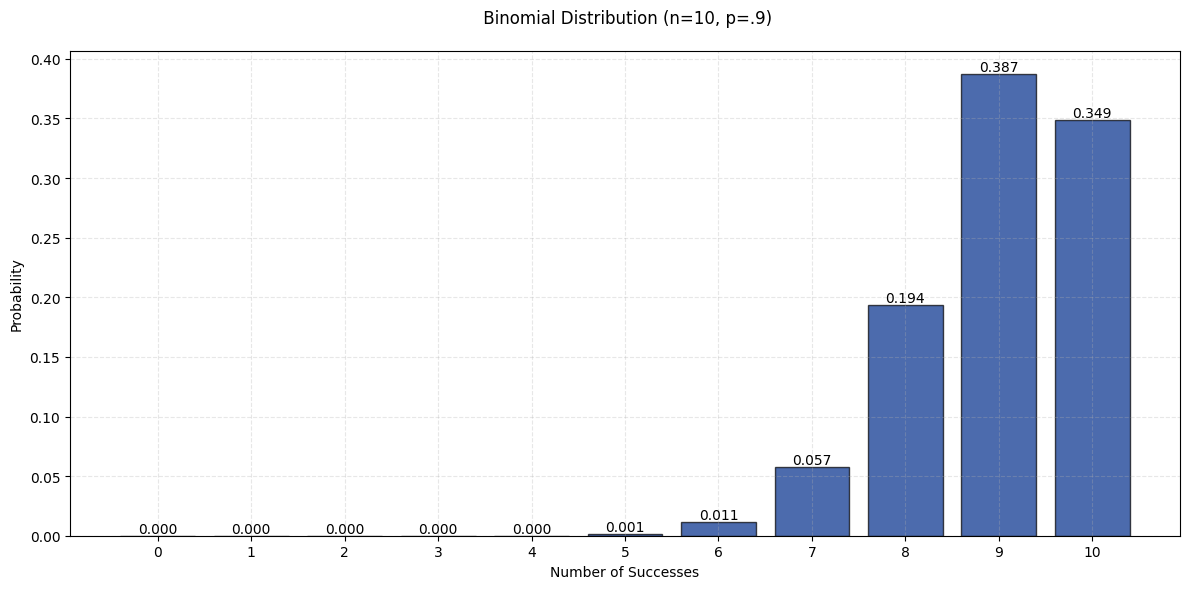

In [72]:
# Create the visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bars = ax.bar(k, y,
             color='#002d8b',
             edgecolor='black',
             alpha=0.7)

# Customize the plot
ax.set_title(' Binomial Distribution (n=10, p=.9)',
            pad=20, fontsize=12)
ax.set_xlabel('Number of Successes')

ax.set_ylabel('Probability')

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Set x-axis ticks
ax.set_xticks(k)

# Add value labels on top of each bar
for bar in bars:
   height = bar.get_height()
   ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.3f}',
           ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('oknOaBLC.svg')
plt.savefig('oknOaBLC.pdf')
plt.savefig('oknOaBLC.png')

plt.show()


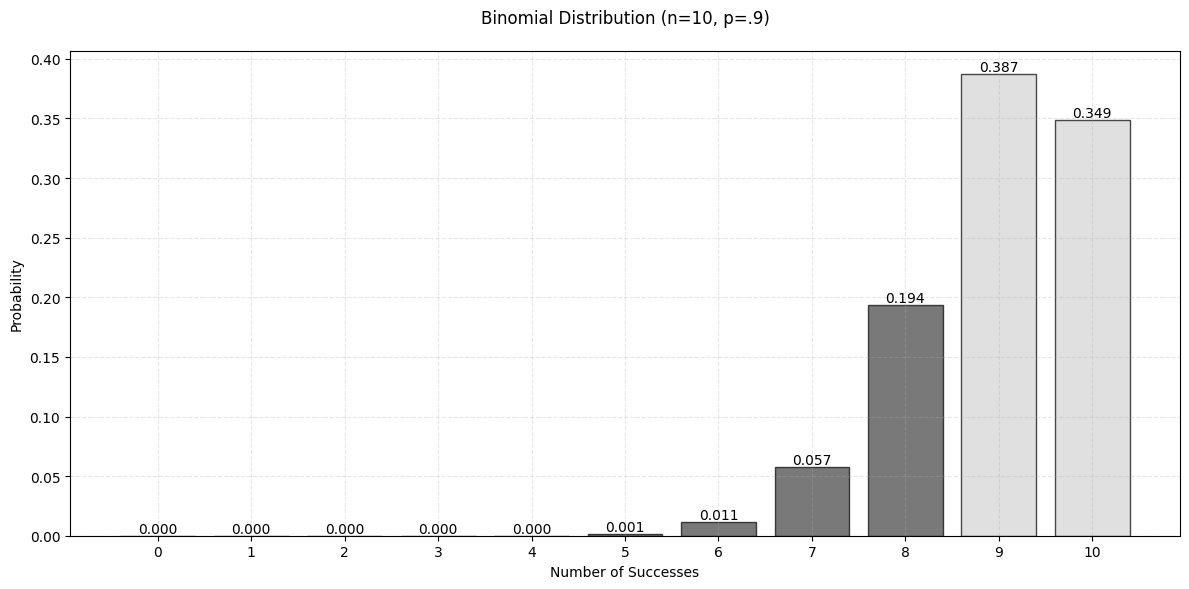

In [3]:
# Create the visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars with colors based on condition
colors = ['#404040' if x <= 8 else '#D3D3D3' for x in k]

# Create bars
bars = ax.bar(k, y,
             color=colors,
             edgecolor='black',
             alpha=0.7)

# Customize the plot
ax.set_title('Binomial Distribution (n=10, p=.9)',
            pad=20, fontsize=12)
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Set x-axis ticks
ax.set_xticks(k)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig('Ofp81UXY.svg')
plt.savefig('Ofp81UXY.png')
plt.show()

### Summing a Range for the Binomial Distribution

In [4]:
from scipy.stats import binom

result = sum(binom.pmf(k, n=10, p=.9) for k in range(0,9))
print(result) # 0.2639010709-


0.2639010709


### 3.2.4 Beta Distribution

### Figure 3.6 Plotting the beta distribution

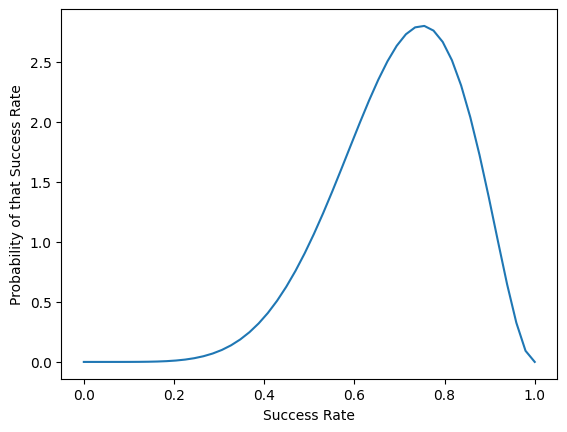

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

plt.plot(x, y)
plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

plt.savefig('bRsa5bmO.svg')
plt.savefig('bRsa5bmO.pdf')
plt.savefig('bRsa5bmO.png')

plt.show()


### The Beta Distribution in SciPy

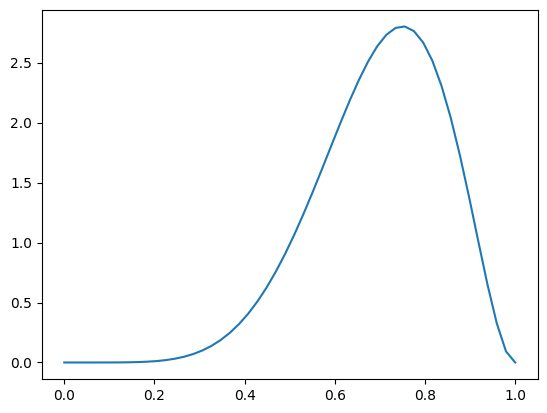

In [75]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

plt.plot(x, y)

plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

plt.savefig('xiBu7qKV.svg')
plt.savefig('xiBu7qKV.pdf')
plt.savefig('xiBu7qKV.png')

plt.show()


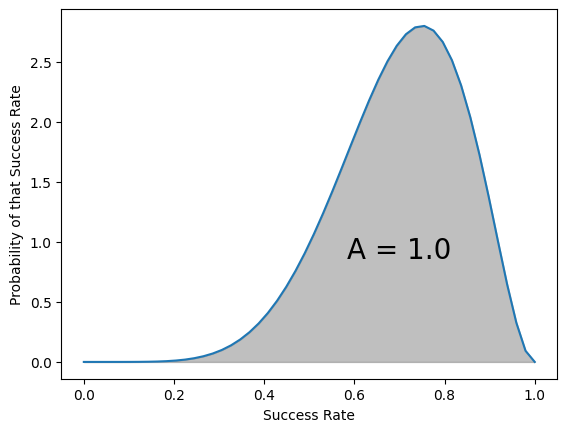

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

lower_area_x, upper_area_x = 0, 1
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='grey')

# Add label in the center
plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

# Calculate center position (x=0.5 for center of [0,1], y at half of max height)
center_x = 0.7
center_y = max(y) / 3
plt.text(center_x, center_y, 'A = 1.0',
         horizontalalignment='center',
         verticalalignment='center',
         size=20)



plt.savefig('dAyO98hQ.svg')
plt.savefig('dAyO98hQ.png')

plt.show()


### Figure 3.7 The area under the curve

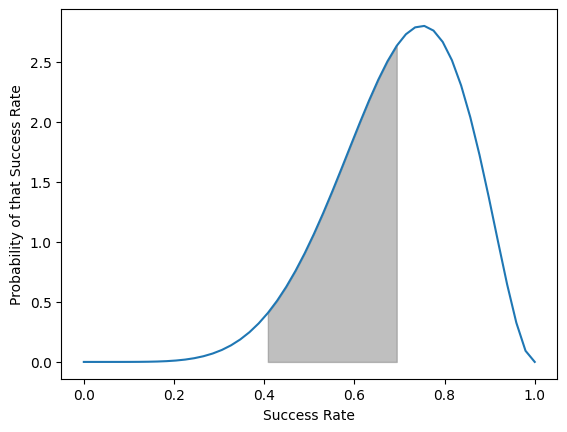

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

lower_area_x, upper_area_x = .4, .7
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='grey')

plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')


plt.savefig('HmjQoBNp.svg')
plt.savefig('HmjQoBNp.png')

plt.show()


### Figure 3.7 The Full Area

AREA: 0.43779641399999986


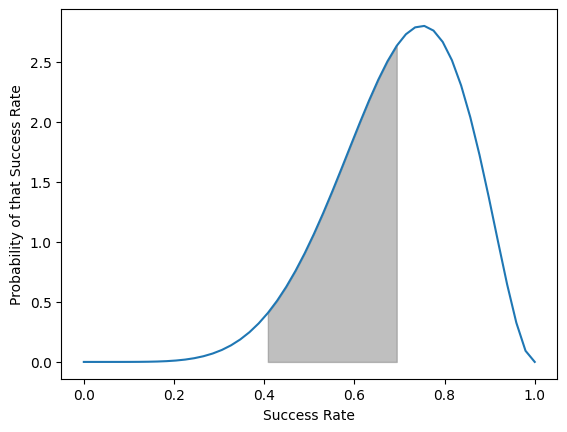

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

lower_area_x, upper_area_x = .4, .7
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

area = beta.cdf(upper_area_x, a, b) - beta.cdf(lower_area_x, a, b)
print(f"AREA: {area}")

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='grey')


plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

"""
plt.text(.55, .3, f"Area = {area:.1f}",
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=12
        )
"""

plt.savefig('dDFr0NA3.svg')
plt.savefig('dDFr0NA3.png')

plt.show()


### Figure 3.8 Area up to .7

AREA: 0.46283116599999985


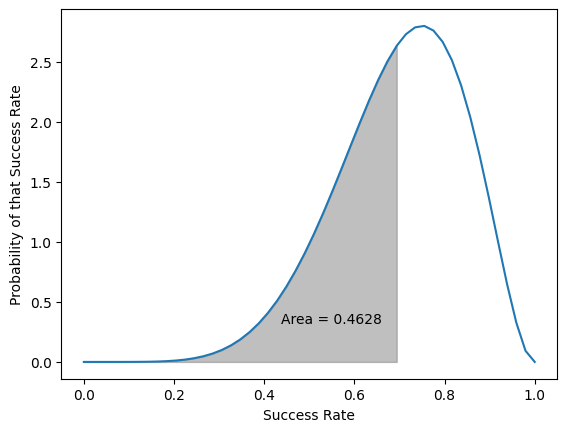

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

lower_area_x, upper_area_x = 0, .7
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

area = beta.cdf(upper_area_x, a, b) - beta.cdf(lower_area_x, a, b)
print(f"AREA: {area}")

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='grey')
plt.text(.55, .3, f"Area = {area:.4f}",
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=10
        )


plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

plt.savefig('cfcSZYVe.svg')
plt.savefig('cfcSZYVe.pdf')
plt.savefig('cfcSZYVe.png')

plt.show()


### Area Up to .4

AREA: 0.025034752000000007


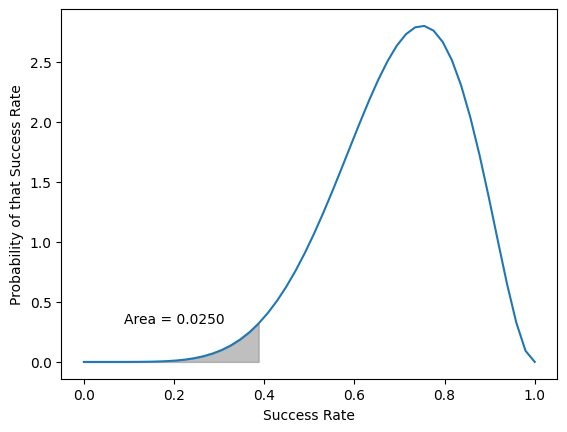

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

a, b = 7, 3 # successes, failures

x = np.linspace(0, 1)
y = beta.pdf(x, a, b)

lower_area_x, upper_area_x = 0, .4
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

area = beta.cdf(upper_area_x, a, b) - beta.cdf(lower_area_x, a, b)
print(f"AREA: {area}")

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='grey')
plt.text(.2, .3, f"Area = {area:.4f}",
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=10
        )



plt.xlabel('Success Rate')
plt.ylabel('Probability of that Success Rate')

plt.savefig('5E3rXSey.svg')
plt.savefig('5E3rXSey.pdf')
plt.savefig('5E3rXSey.png')

plt.show()


### Calculating the Area in SciPy

In [80]:
from scipy.stats import beta
a, b = 7, 3 # successes, failures
area = beta.cdf(.4, a, b)
print(f"AREA: {area}") # 0.025034752000000007


AREA: 0.025034752000000007


## 3.2.5 Poisson Distribution

SciPy implementation of a Poisson distribution.

In [81]:
import numpy as np
from scipy.stats import poisson

# Set the Poisson mean parameter
mean = 10 # lambda is a reserved keyword in Python

# Create a numpy array for the x-axis
x = np.arange(0, 21, 1)

# Calculate the Poisson probability mass function (PMF) values for the given lambda and x values
y = poisson.pmf(x, mu=mean)

for _x,_y in zip(x,y):
    print(f"The probability of {_x} views within 1 minute is {_y:.4f}")


The probability of 0 views within 1 minute is 0.0000
The probability of 1 views within 1 minute is 0.0005
The probability of 2 views within 1 minute is 0.0023
The probability of 3 views within 1 minute is 0.0076
The probability of 4 views within 1 minute is 0.0189
The probability of 5 views within 1 minute is 0.0378
The probability of 6 views within 1 minute is 0.0631
The probability of 7 views within 1 minute is 0.0901
The probability of 8 views within 1 minute is 0.1126
The probability of 9 views within 1 minute is 0.1251
The probability of 10 views within 1 minute is 0.1251
The probability of 11 views within 1 minute is 0.1137
The probability of 12 views within 1 minute is 0.0948
The probability of 13 views within 1 minute is 0.0729
The probability of 14 views within 1 minute is 0.0521
The probability of 15 views within 1 minute is 0.0347
The probability of 16 views within 1 minute is 0.0217
The probability of 17 views within 1 minute is 0.0128
The probability of 18 views within 1 m

## Matplotlib of the Poisson Distribution

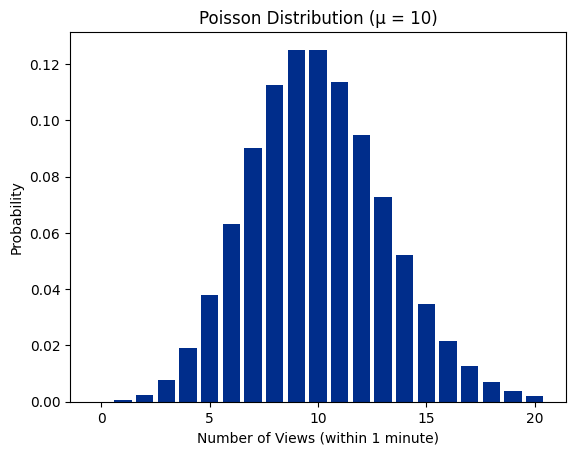

In [82]:
# Create a bar chart of the PMF values
import matplotlib.pyplot as plt

plt.bar(x, y, align='center', color='#002d8b')

# Set the title and labels
plt.title('Poisson Distribution (μ = 10)')
plt.xlabel('Number of Views (within 1 minute)')
plt.ylabel('Probability')

# Show the plot
plt.savefig('5E3rXSey.svg')
plt.savefig('5E3rXSey.pdf')
plt.savefig('5E3rXSey.png')

plt.show()


m

### Generating Random values

In [96]:
from numpy.random import poisson

sample = poisson(lam=10, size=20)

print(sample)

# Your answer will differ:
# array([ 8,  9, 12,  5,  7,  7, 13,  8, 13,  6, 11,
# 5,  9, 11,  4, 12, 12, 6, 10, 10])


array([ 8,  9, 12,  5,  7,  7, 13,  8, 13,  6, 11,  5,  9, 11,  4, 12, 12,
        6, 10, 10])

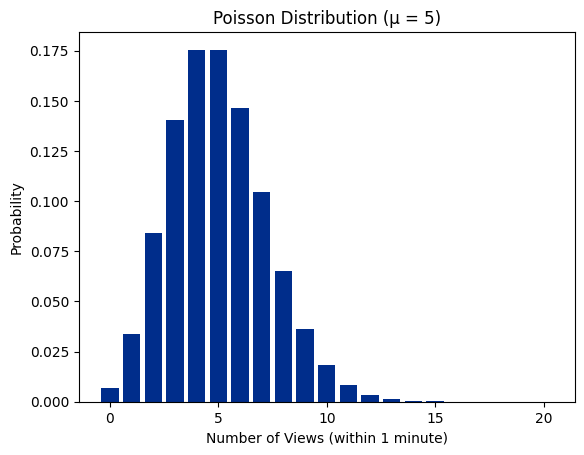

In [83]:
import numpy as np
from scipy.stats import poisson

# Set the Poisson mean parameter
mean = 5 # lambda is a reserved keyword in Python

# Create a numpy array for the x-axis
x = np.arange(0, 21, 1)

# Calculate the Poisson probability mass function (PMF) values for the given lambda and x values
y = poisson.pmf(x, mu=mean)

# Create a bar chart of the PMF values
import matplotlib.pyplot as plt

plt.bar(x, y, align='center', color='#002d8b')

# Set the title and labels
plt.title('Poisson Distribution (μ = 5)')
plt.xlabel('Number of Views (within 1 minute)')
plt.ylabel('Probability')

# Show the plot
plt.savefig('izsdZ521.svg')
plt.savefig('izsdZ521.pdf')
plt.savefig('izsdZ521.png')

plt.show()


## 3.2.6 Exponential Distribution

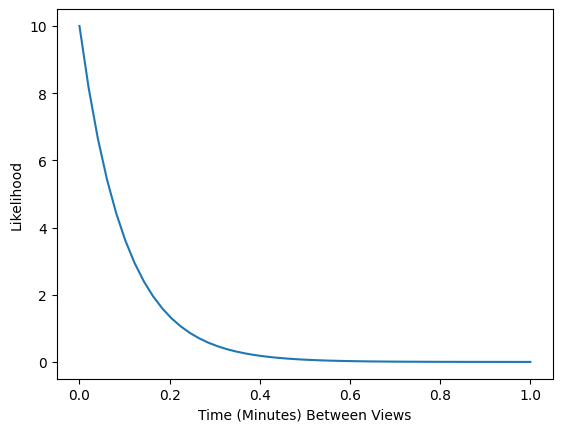

In [14]:
from scipy.stats import expon

mu = 10 # mean views per minute

x = np.linspace(0, 1)
y = expon.pdf(x, scale=1/mu)

plt.plot(x, y)

# Add axis labels
plt.xlabel('Time (Minutes) Between Views')
plt.ylabel('Likelihood')

# Show the plot
plt.savefig('yFV1HOiM.svg')
plt.savefig('yFV1HOiM.pdf')
plt.savefig('yFV1HOiM.png')

plt.show()

### Figure 3.12 Area showing probability of .4 or less minutes

AREA: 0.9816843611112658


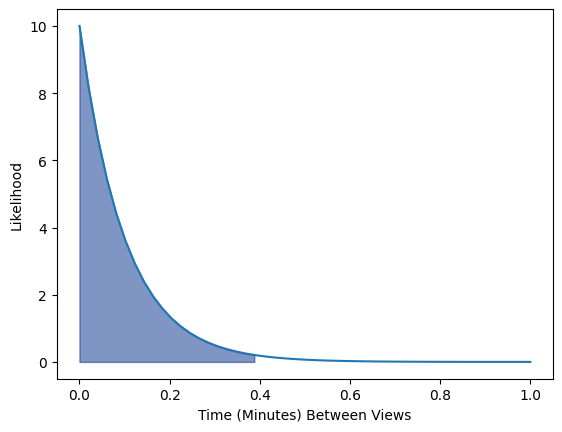

In [20]:
from scipy.stats import expon

mu = 10 # mean views per minute

x = np.linspace(0, 1)
y = expon.pdf(x, scale=1/mu)

# Calculate and plot the area under the curve
lower_area_x, upper_area_x = 0, .4
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)
area = expon.cdf(upper_area_x, scale=1/mu) - expon.cdf(lower_area_x, scale=1/mu)
print(f"AREA: {area}")


# Add axis labels
plt.plot(x, y)
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5, color="#002d8b")

plt.xlabel('Time (Minutes) Between Views')
plt.ylabel('Likelihood')

# Show the plot
plt.savefig('USR7qf5h.svg')
plt.savefig('USR7qf5h.pdf')
plt.savefig('USR7qf5h.png')

plt.show()

### Calculating the probability of .4 or less minutes

In [23]:
from scipy.stats import expon

mu = 10 # mean views per minute

area = expon.cdf(.4, scale=1/mu)

# AREA: 0.9816843611112658
print(f"AREA: {area}")


AREA: 0.9816843611112658


### Area showing probability of .2 or less minutes

AREA: 0.8646647167633873


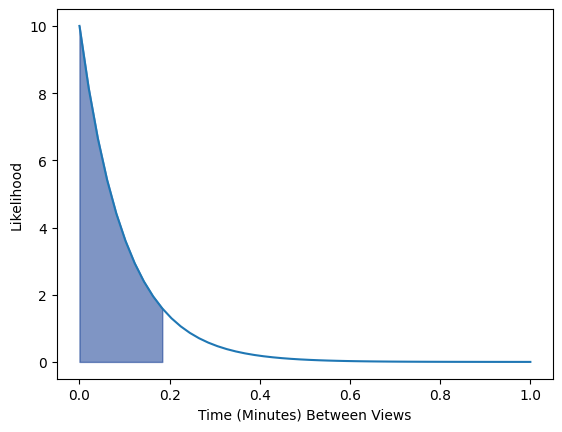

In [24]:
from scipy.stats import expon

mu = 10 # mean views per minute

x = np.linspace(0, 1)
y = expon.pdf(x, scale=1/mu)

# Calculate and plot the area under the curve
lower_area_x, upper_area_x = 0, .2
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)
area = expon.cdf(upper_area_x, scale=1/mu) - expon.cdf(lower_area_x, scale=1/mu)
print(f"AREA: {area}")


# Add axis labels
plt.plot(x, y)
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5, color="#002d8b")

plt.xlabel('Time (Minutes) Between Views')
plt.ylabel('Likelihood')

# Show the plot
plt.savefig('fIBklsxw.svg')
plt.savefig('fIBklsxw.pdf')
plt.savefig('fIBklsxw.png')

plt.show()

### Area from .2 to .4 minutes

AREA: 0.11701964434787848


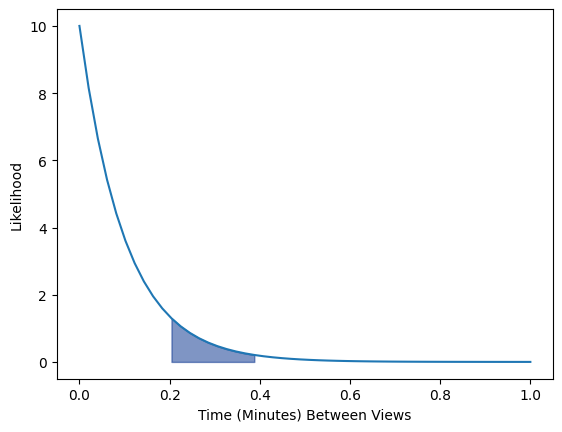

In [25]:
from scipy.stats import expon

mu = 10 # mean views per minute

x = np.linspace(0, 1)
y = expon.pdf(x, scale=1/mu)

# Calculate and plot the area under the curve
lower_area_x, upper_area_x = .2, .4
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)
area = expon.cdf(upper_area_x, scale=1/mu) - expon.cdf(lower_area_x, scale=1/mu)
print(f"AREA: {area}")


# Add axis labels
plt.plot(x, y)
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5, color="#002d8b")

plt.xlabel('Time (Minutes) Between Views')
plt.ylabel('Likelihood')

# Show the plot
plt.savefig('owprxtvg.svg')
plt.savefig('owprxtvg.pdf')
plt.savefig('owprxtvg.png')

plt.show()

### SciPy to Find Area/Probability Between .2 and .4 Minutes

In [26]:
from scipy.stats import expon

mu = 10 # mean views per minute

area = expon.cdf(.4, scale=1/mu) - expon.cdf(.2, scale=1/mu)

# AREA: 0.11701964434787848
print(f"AREA: {area}")


AREA: 0.11701964434787848


### Generating random values from Exponential

In [35]:
from numpy.random import exponential as expon

mu = 10 # mean views per minute
times_between_views = expon(scale=1/mu, size=10)

print(times_between_views)
# Your times will vary
# array([0.04256854, 0.08893854, 0.04248317, 0.07514961, 0.05067546,
#       0.05795616, 0.01069159, 0.14543745, 0.17855999, 0.14383976])


array([0.04256854, 0.08893854, 0.04248317, 0.07514961, 0.05067546,
       0.05795616, 0.01069159, 0.14543745, 0.17855999, 0.14383976])

## 3.3 Creating a Monte Carlo Simulation

### Using a Poisson Distribution

In [157]:
from numpy.random import poisson

mu = .3

shots_pulled = 0

# Model each minute across 3 hours,
# and add the shots done for each minute
for i in range(3*60):
    new_shots_pulled = poisson(lam=mu, size=1)[0]
    print(f"MINUTE {i}: {new_shots_pulled} shots pulled")
    shots_pulled += new_shots_pulled

print(f"Total shots pulled in 3 hours: {shots_pulled}")

MINUTE 0: 0 shots pulled
MINUTE 1: 0 shots pulled
MINUTE 2: 1 shots pulled
MINUTE 3: 1 shots pulled
MINUTE 4: 0 shots pulled
MINUTE 5: 0 shots pulled
MINUTE 6: 0 shots pulled
MINUTE 7: 0 shots pulled
MINUTE 8: 0 shots pulled
MINUTE 9: 1 shots pulled
MINUTE 10: 0 shots pulled
MINUTE 11: 0 shots pulled
MINUTE 12: 1 shots pulled
MINUTE 13: 0 shots pulled
MINUTE 14: 1 shots pulled
MINUTE 15: 2 shots pulled
MINUTE 16: 0 shots pulled
MINUTE 17: 1 shots pulled
MINUTE 18: 1 shots pulled
MINUTE 19: 0 shots pulled
MINUTE 20: 0 shots pulled
MINUTE 21: 1 shots pulled
MINUTE 22: 0 shots pulled
MINUTE 23: 0 shots pulled
MINUTE 24: 0 shots pulled
MINUTE 25: 0 shots pulled
MINUTE 26: 0 shots pulled
MINUTE 27: 0 shots pulled
MINUTE 28: 0 shots pulled
MINUTE 29: 1 shots pulled
MINUTE 30: 0 shots pulled
MINUTE 31: 1 shots pulled
MINUTE 32: 0 shots pulled
MINUTE 33: 0 shots pulled
MINUTE 34: 0 shots pulled
MINUTE 35: 0 shots pulled
MINUTE 36: 0 shots pulled
MINUTE 37: 1 shots pulled
MINUTE 38: 0 shots pul

### Using Exponential Distribution

In [166]:
from numpy.random import exponential as expon

mu = .3

time_elapsed = 0.0
shots_pulled = 0

# Model each minute across 3 hours,
# and add the shots done for each minute
while True:
    time_elapsed_to_shot = expon(scale=1/mu, size=1)[0]

    time_elapsed += time_elapsed_to_shot

    if time_elapsed > 180:
        break

    shots_pulled +=1

    print(f"{time_elapsed:.2f} minutes: {shots_pulled} shots pulled")

print(f"Total shots pulled in 3 hours: {shots_pulled}")

3.32 minutes: 1 shots pulled
4.75 minutes: 2 shots pulled
8.43 minutes: 3 shots pulled
12.99 minutes: 4 shots pulled
13.13 minutes: 5 shots pulled
16.78 minutes: 6 shots pulled
20.17 minutes: 7 shots pulled
22.71 minutes: 8 shots pulled
23.47 minutes: 9 shots pulled
28.58 minutes: 10 shots pulled
29.67 minutes: 11 shots pulled
30.49 minutes: 12 shots pulled
31.56 minutes: 13 shots pulled
38.10 minutes: 14 shots pulled
43.70 minutes: 15 shots pulled
50.72 minutes: 16 shots pulled
53.53 minutes: 17 shots pulled
57.48 minutes: 18 shots pulled
70.10 minutes: 19 shots pulled
71.99 minutes: 20 shots pulled
74.10 minutes: 21 shots pulled
75.72 minutes: 22 shots pulled
77.57 minutes: 23 shots pulled
77.88 minutes: 24 shots pulled
77.91 minutes: 25 shots pulled
78.12 minutes: 26 shots pulled
79.15 minutes: 27 shots pulled
82.12 minutes: 28 shots pulled
83.22 minutes: 29 shots pulled
84.07 minutes: 30 shots pulled
86.98 minutes: 31 shots pulled
87.75 minutes: 32 shots pulled
89.88 minutes: 33 sh